# Section 1

In [1]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import *
from sklearn.linear_model import LinearRegression

In [2]:
def covid_sp_cases_v_deaths(dataset, datasetname):
    # get cases and deaths for line of best fit
    X = np.array(dataset['cases']).reshape((-1, 1))
    Y = np.array(dataset['deaths']) #.reshape(-1, 1)
    
    model = LinearRegression().fit(X, Y)
    y_line = model.predict(X)
    r_sq = model.score(X, Y)
    
    print(f'The slope of the line: {model.coef_}')
    print(f"coefficient of determination: {r_sq}")
    
    plt.scatter('cases', 'deaths', data=dataset)
    plt.plot(X, y_line, 'r')
    plt.title("Cases vs. Deaths for " + datasetname)
    plt.xlabel("Cases")
    plt.ylabel("Deaths")
    plt.show()

In [3]:
def covid_bar(dataset, granularity, bar_var, datasetname, n=20):
    # Sort data by cases and then plot bar graph of cases
    dataset = dataset.sort_values(by = bar_var, ascending = False)
    dataset = dataset.head(n)
    bar_var_data = dataset[bar_var].to_numpy()
    labels = dataset[granularity]
    plt.yticks(range(len(bar_var_data)), labels)
    plt.ylabel(granularity)
    plt.xlabel(bar_var + " of Covid-19")
    plt.title(datasetname + " " + bar_var + " of Covid-19 by " + granularity)
    plt.barh(range(len(bar_var_data)), bar_var_data)
    plt.show()

# Section 2

In [4]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
covid_data = pd.read_csv(url, sep=",")
covid_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [5]:
url = "https://corgis-edu.github.io/corgis/datasets/csv/county_demographics/county_demographics.csv"
county_data = pd.read_csv(url, sep=",")
county_data.head()

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,...,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,...,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,...,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,...,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,...,13.5,-1,63002,914,304,499,0,861,185,679


# Section 3

In [6]:
display(covid_data.dtypes)

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [7]:
# convert date column from object type to datetime type
covid_data["date"] = pd.to_datetime(covid_data["date"], infer_datetime_format = True)
# convert date column from datetime type to the date format matplotlib uses
covid_data["date2"] = mpl.dates.date2num(covid_data["date"])
# check that the conversion of date column from object to datetime and datetime to float (for date2) went through correctly
display(covid_data.dtypes)

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths           float64
date2            float64
dtype: object

In [8]:
# get the latest date in the dataset and look at it
latest_date = covid_data["date2"].max()
# get the index of the latest row
latest_row = len(covid_data) - 1
# print these global variables
print("Latest Date: " + str(latest_date))
print("Latest Row: " + str(latest_row))

Latest Date: 19125.0
Latest Row: 2502831


In [9]:
latest_covid_data = covid_data[covid_data["date2"] == latest_date]
latest_covid_data.head()

,date,county,state,fips,cases,deaths,date2
2499574,2022-05-13,Autauga,Alabama,1001.0,15863,216.0,19125.0
2499575,2022-05-13,Baldwin,Alabama,1003.0,55862,681.0,19125.0
2499576,2022-05-13,Barbour,Alabama,1005.0,5681,98.0,19125.0
2499577,2022-05-13,Bibb,Alabama,1007.0,6457,105.0,19125.0
2499578,2022-05-13,Blount,Alabama,1009.0,15005,243.0,19125.0


In [10]:
latest_covid_data['deaths_per_case'] = 0
latest_covid_data['deaths_per_case'].where(~(latest_covid_data.cases > 0), other=latest_covid_data.deaths / latest_covid_data.cases, inplace=True)
latest_covid_data.head()

C:\Users\harde\AppData\Local\Temp\ipykernel_22108\1206898279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_covid_data['deaths_per_case'] = 0
C:\Users\harde\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,date,county,state,fips,cases,deaths,date2,deaths_per_case
2499574,2022-05-13,Autauga,Alabama,1001.0,15863,216.0,19125.0,0.013617
2499575,2022-05-13,Baldwin,Alabama,1003.0,55862,681.0,19125.0,0.012191
2499576,2022-05-13,Barbour,Alabama,1005.0,5681,98.0,19125.0,0.017250
2499577,2022-05-13,Bibb,Alabama,1007.0,6457,105.0,19125.0,0.016261
2499578,2022-05-13,Blount,Alabama,1009.0,15005,243.0,19125.0,0.016195


# Section 4

In [11]:
states_covid_data = latest_covid_data.groupby(['state'])['cases', 'deaths'].sum().reset_index()
states_covid_data['deaths_per_case'] = 0
states_covid_data['deaths_per_case'].where(~(states_covid_data.cases > 0), other=states_covid_data.deaths / states_covid_data.cases, inplace=True)
states_covid_data.head()

C:\Users\harde\AppData\Local\Temp\ipykernel_22108\2154606737.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  states_covid_data = latest_covid_data.groupby(['state'])['cases', 'deaths'].sum().reset_index()


,state,cases,deaths,deaths_per_case
0,Alabama,1304710,19628.0,0.015044
1,Alaska,254467,1228.0,0.004826
2,American Samoa,5930,30.0,0.005059
3,Arizona,2030925,30230.0,0.014885
4,Arkansas,838251,11415.0,0.013618


The slope of the line: [0.01165678]
coefficient of determination: 0.954559559059236


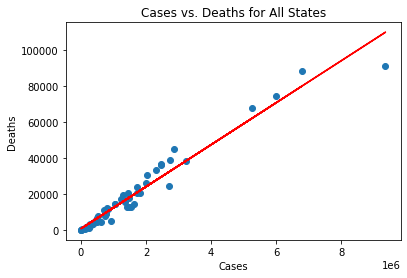

In [12]:
covid_sp_cases_v_deaths(states_covid_data, "All States")

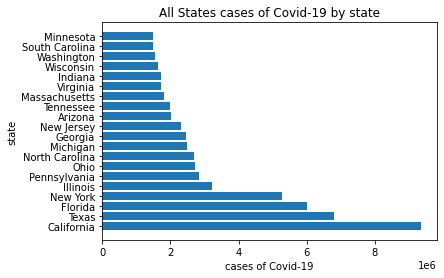

In [13]:
covid_bar(states_covid_data, "state", "cases", "All States")

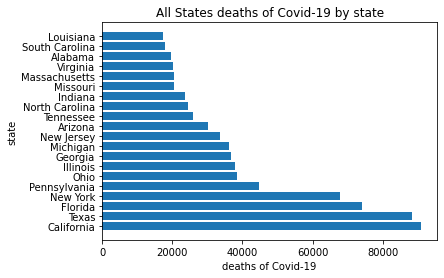

In [14]:
covid_bar(states_covid_data, "state", "deaths", "All States")

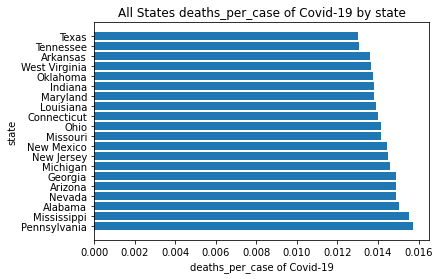

In [15]:
covid_bar(states_covid_data, "state", "deaths_per_case", "All States")

# Section 5

In [16]:
fl_covid_data = latest_covid_data[latest_covid_data['state'] == 'Florida']
fl_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2499897,2022-05-13,Alachua,Florida,12001.0,69008,665.0,19125.0,0.009637
2499898,2022-05-13,Baker,Florida,12003.0,8712,142.0,19125.0,0.016299
2499899,2022-05-13,Bay,Florida,12005.0,45926,827.0,19125.0,0.018007
2499900,2022-05-13,Bradford,Florida,12007.0,7538,150.0,19125.0,0.019899
2499901,2022-05-13,Brevard,Florida,12009.0,135740,2100.0,19125.0,0.015471


The slope of the line: [0.00941024]
coefficient of determination: 0.9447458653670323


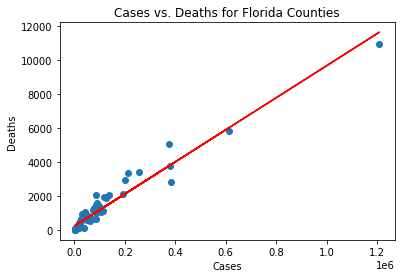

In [17]:
covid_sp_cases_v_deaths(fl_covid_data, "Florida Counties")

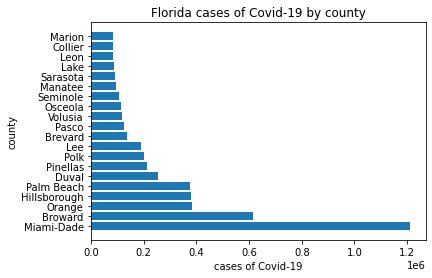

In [18]:
covid_bar(fl_covid_data, "county", "cases", "Florida")

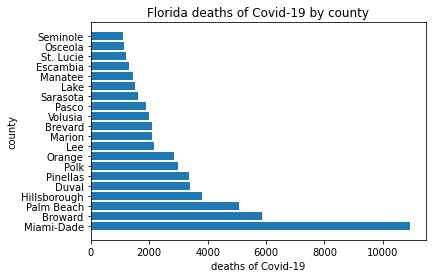

In [19]:
covid_bar(fl_covid_data, "county", "deaths", "Florida")

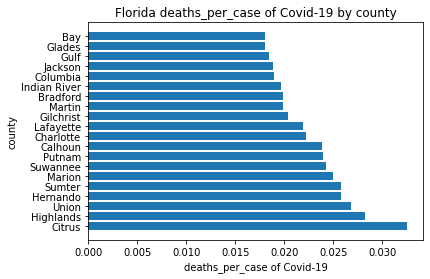

In [20]:
covid_bar(fl_covid_data, "county", "deaths_per_case", "Florida")

# Section 6

In [21]:
ms_covid_data = latest_covid_data[latest_covid_data['state'] == 'Mississippi']
ms_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2500992,2022-05-13,Adams,Mississippi,28001.0,7224,143.0,19125.0,0.019795
2500993,2022-05-13,Alcorn,Mississippi,28003.0,10080,160.0,19125.0,0.015873
2500994,2022-05-13,Amite,Mississippi,28005.0,3259,69.0,19125.0,0.021172
2500995,2022-05-13,Attala,Mississippi,28007.0,5361,113.0,19125.0,0.021078
2500996,2022-05-13,Benton,Mississippi,28009.0,2274,49.0,19125.0,0.021548


The slope of the line: [0.01237469]
coefficient of determination: 0.9437463057894229


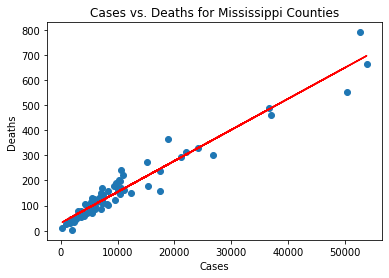

In [22]:
covid_sp_cases_v_deaths(ms_covid_data, "Mississippi Counties")

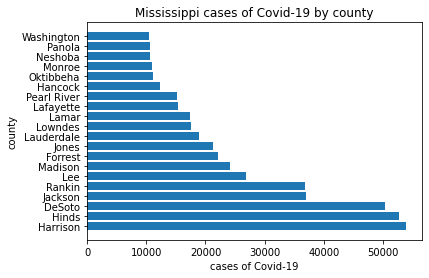

In [23]:
covid_bar(ms_covid_data, "county", "cases", "Mississippi")

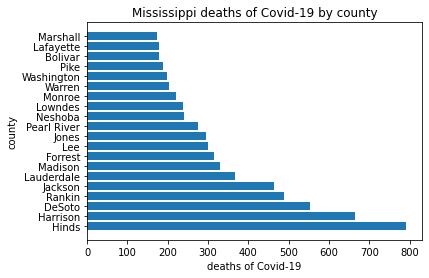

In [24]:
covid_bar(ms_covid_data, "county", "deaths", "Mississippi")

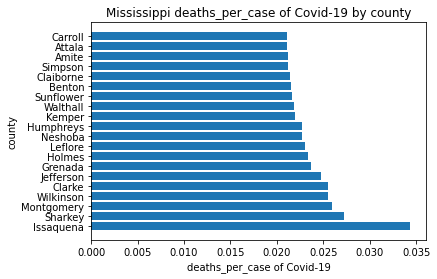

In [25]:
covid_bar(ms_covid_data, "county", "deaths_per_case", "Mississippi")

# Section 7

In [26]:
oh_covid_data = latest_covid_data[latest_covid_data['state'] == 'Ohio']
oh_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2501643,2022-05-13,Adams,Ohio,39001.0,7022,148.0,19125.0,0.021077
2501644,2022-05-13,Allen,Ohio,39003.0,27636,478.0,19125.0,0.017296
2501645,2022-05-13,Ashland,Ohio,39005.0,12109,218.0,19125.0,0.018003
2501646,2022-05-13,Ashtabula,Ohio,39007.0,20537,431.0,19125.0,0.020987
2501647,2022-05-13,Athens,Ohio,39009.0,14852,142.0,19125.0,0.009561


The slope of the line: [0.0115994]
coefficient of determination: 0.9160174123581815


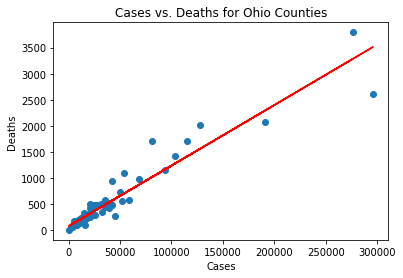

In [27]:
covid_sp_cases_v_deaths(oh_covid_data, "Ohio Counties")

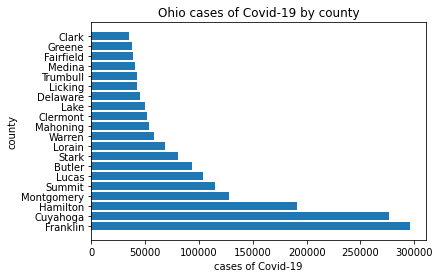

In [28]:
covid_bar(oh_covid_data, "county", "cases", "Ohio")

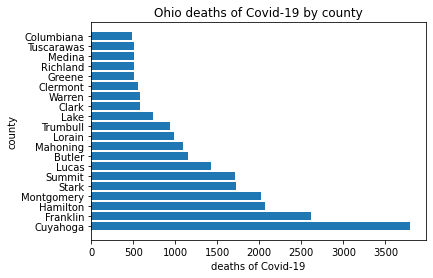

In [29]:
covid_bar(oh_covid_data, "county", "deaths", "Ohio")

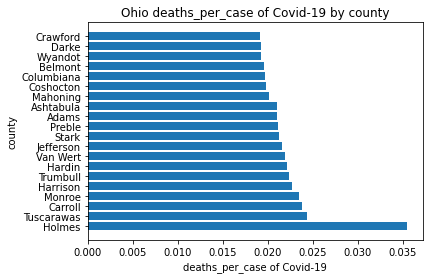

In [30]:
covid_bar(oh_covid_data, "county", "deaths_per_case", "Ohio")

# Section 8

In [31]:
ny_covid_data = latest_covid_data[latest_covid_data['state'] == 'New York']
ny_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2501427,2022-05-13,Albany,New York,36001.0,63461,523.0,19125.0,0.008241
2501428,2022-05-13,Allegany,New York,36003.0,9275,155.0,19125.0,0.016712
2501429,2022-05-13,Broome,New York,36007.0,48947,520.0,19125.0,0.010624
2501430,2022-05-13,Cattaraugus,New York,36009.0,16113,222.0,19125.0,0.013778
2501431,2022-05-13,Cayuga,New York,36011.0,17375,152.0,19125.0,0.008748


The slope of the line: [0.01623543]
coefficient of determination: 0.9868159454995727


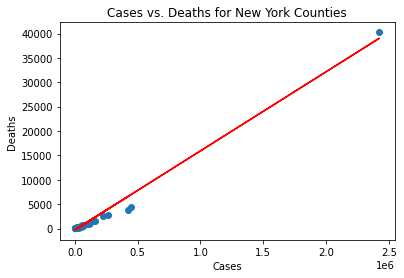

In [32]:
covid_sp_cases_v_deaths(ny_covid_data, "New York Counties")

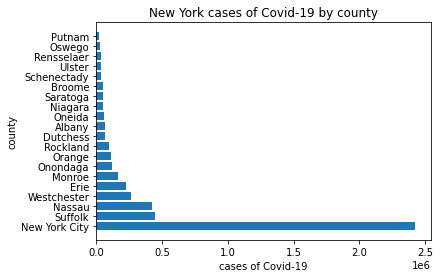

In [33]:
covid_bar(ny_covid_data, "county", "cases", "New York")

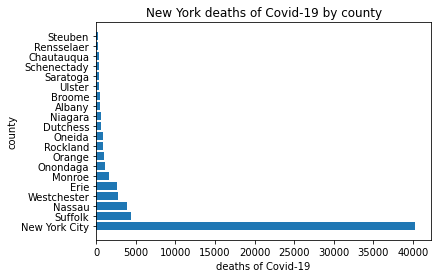

In [34]:
covid_bar(ny_covid_data, "county", "deaths", "New York")

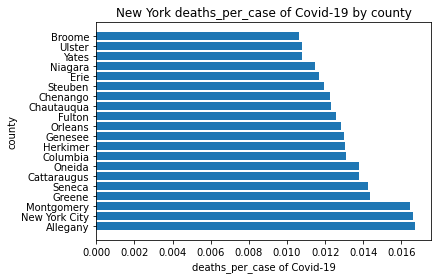

In [35]:
covid_bar(ny_covid_data, "county", "deaths_per_case", "New York")

# Section 9

In [36]:
msri_covid_data = latest_covid_data[latest_covid_data['state'] == 'Missouri']
msri_covid_data.head()

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2501075,2022-05-13,Adair,Missouri,29001.0,6095,63.0,19125.0,0.010336
2501076,2022-05-13,Andrew,Missouri,29003.0,4828,58.0,19125.0,0.012013
2501077,2022-05-13,Atchison,Missouri,29005.0,1387,23.0,19125.0,0.016583
2501078,2022-05-13,Audrain,Missouri,29007.0,5717,110.0,19125.0,0.019241
2501079,2022-05-13,Barry,Missouri,29009.0,6648,132.0,19125.0,0.019856


The slope of the line: [0.01303269]
coefficient of determination: 0.9634808009702319


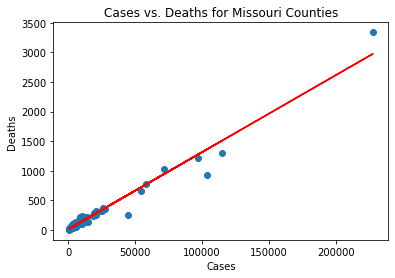

In [37]:
covid_sp_cases_v_deaths(msri_covid_data, "Missouri Counties")

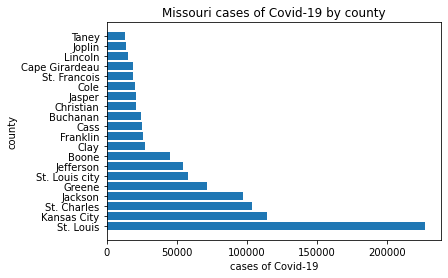

In [38]:
covid_bar(msri_covid_data, "county", "cases", "Missouri")

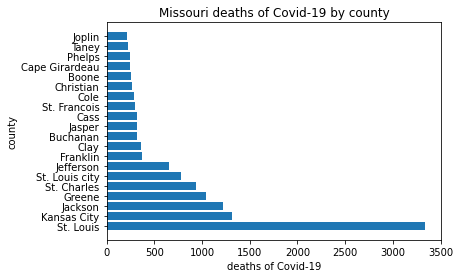

In [39]:
covid_bar(msri_covid_data, "county", "deaths", "Missouri")

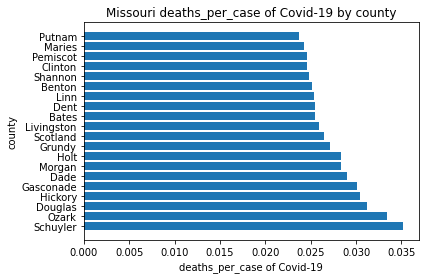

In [40]:
covid_bar(msri_covid_data, "county", "deaths_per_case", "Missouri")